In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

# seed
torch.manual_seed(11317)
torch.cuda.manual_seed(11317)
np.random.seed(11317)

# Load the Dataset

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

train_dir = "gdrive/My Drive/cnn_gc/train"
test_dir = "gdrive/My Drive/cnn_gc/test"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_transform = transforms.Compose([
    transforms.CenterCrop(180),
    transforms.RandomRotation(5), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


test_transform = transforms.Compose([
    transforms.CenterCrop(180),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_img = datasets.ImageFolder(train_dir, transform=train_transform)
test_img = datasets.ImageFolder(train_dir, transform=test_transform)

# Explore the Data

In [6]:
print("train_img type   :",type(train_img))
print("train_img length :",len(train_img))
print("train_img classes:",train_img.classes)
print("train_img[0] type:",type(train_img[0]))
print("train_img[0][0] t:",type(train_img[0][0]))
print("train_img[0][1] t:",type(train_img[0][1]))
print("train_img[0][0] s:",train_img[0][0].size())
print("train_img[0][1]  :",train_img[0][1])

train_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
train_img length : 810
train_img classes: ['JUICE', 'SODA', 'VINEGAR', 'WATER']
train_img[0] type: <class 'tuple'>
train_img[0][0] t: <class 'torch.Tensor'>
train_img[0][1] t: <class 'int'>
train_img[0][0] s: torch.Size([3, 180, 180])
train_img[0][1]  : 0


In [0]:
def imshow(data_image, tensor=False):
    image = data_image[0]
    label = data_image[1]
    image = image.numpy().transpose((1, 2, 0))

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5],)
    image = std * image + mean
    image = np.clip(image, 0, 1)

    plt.imshow(image)
    plt.show()
    
    print(train_img.classes[label])

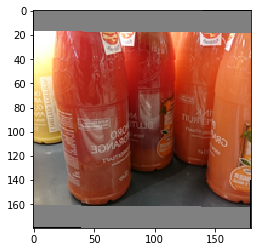

JUICE


In [8]:
imshow(train_img[0])

# Create the Loader

In [0]:
trainloaders = torch.utils.data.DataLoader(train_img, batch_size=64, shuffle=True)
testloaders = torch.utils.data.DataLoader(test_img, batch_size=32, shuffle=True)

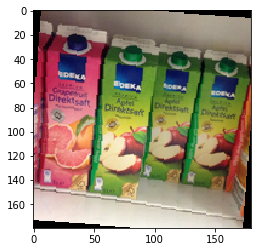

JUICE


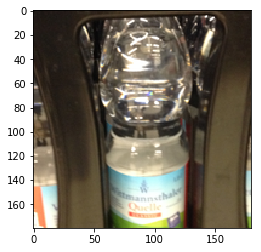

WATER


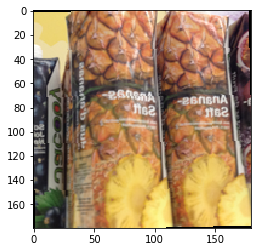

JUICE


In [10]:
for image, label in trainloaders:
    for i in range(3):
        imshow((image[i], label[i]))
    break

# Create the Architecture

In [0]:
class Net(nn.Module):
    
    #  Convolution size formula (W-K+2P)/S+1
    #  Pooling size formula
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=4, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 24, kernel_size=4, stride=1, padding=0)
        self.fc1 = nn.Linear(42336, 500)
        self.fc2 = nn.Linear(500, 4)
        self.do = nn.Dropout()
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.shape[0], -1)
        x = self.do(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [0]:
model = Net()
model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epoch = 20

In [17]:
model.train()

for i in range(epoch):
    total_loss = 0
    total_sample = 0    
    total_correct = 0
    
    for image, label in trainloaders:
        image = image.to('cuda')
        label = label.to('cuda')
        
        out = model(image)
        
        loss = criterion(out, label)
        total_loss += loss.item()
        total_sample += len(label)
        total_correct += torch.sum(torch.max(out,1)[1]==label).item()*1.0
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("epoch", i, total_loss/total_sample, total_correct/total_sample)

epoch 0 0.028293086422814265 0.3148148148148148
epoch 1 0.02071058014292776 0.3851851851851852
epoch 2 0.01807010210590598 0.5271604938271605
epoch 3 0.015715519734370857 0.5864197530864198
epoch 4 0.013604533083644914 0.671604938271605
epoch 5 0.012746109785857024 0.6777777777777778
epoch 6 0.011647378883244078 0.7111111111111111
epoch 7 0.010871650664894669 0.7444444444444445
epoch 8 0.010261650033939033 0.774074074074074
epoch 9 0.009575520731784679 0.7777777777777778
epoch 10 0.008167095243194956 0.7925925925925926
epoch 11 0.008257197818638366 0.8111111111111111
epoch 12 0.006790707214379016 0.8358024691358025
epoch 13 0.006554037921222639 0.8345679012345679
epoch 14 0.00539339072542426 0.8765432098765432
epoch 15 0.005228283596627506 0.8802469135802469
epoch 16 0.005246949030293359 0.8728395061728395
epoch 17 0.0040413776297628145 0.908641975308642
epoch 18 0.0036310441240116403 0.9197530864197531
epoch 19 0.0034680341680844626 0.9308641975308642


In [18]:
model.eval()
total_loss = 0
total_sample = 0    
total_correct = 0

for image, label in testloaders:
    image = image.to('cuda')
    label = label.to('cuda')
    
    out = model(image)

    loss = criterion(out, label)
    total_loss += loss.item()
    total_sample += len(label)
    total_correct += torch.sum(torch.max(out, 1)[1] == label).item()*1.0


print("test loss", total_loss/total_sample)
print("test accuracy", total_correct/total_sample)

test loss 0.00408873227827343
test accuracy 0.9666666666666667


# Sanity Check

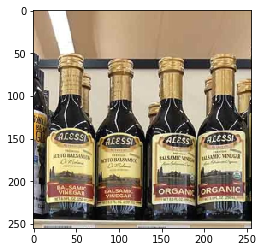

In [44]:
imagepath = "gdrive/My Drive/cnn_gc/balsamic-vinegar-grocery-shelf.png"
image_test = Image.open(imagepath)
plt.imshow(image_test)
plt.show()

In [47]:
image_transformed = test_transform(image_test) 
image_transformed = image_transformed.unsqueeze(0).to("cuda")
out = model(image_transformed)
print("PREDICTION:", train_img.classes[torch.max(out,1)[1]])

PREDICTION: VINEGAR
